In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib import font_manager

import numpy as np
import time
import importlib
import os

import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

os.environ['NUMEXPR_MAX_THREADS'] = '64'
os.environ['NUMEXPR_NUM_THREADS'] = '64'

%config InlineBackend. figure_format = 'retina'

In [19]:
def draw_summary(dictionary: dict={}, xlabel: str="AUC", file_name: str ="auc_summary", interval: int=20, xmin: float=0.75, xmax: float=1)-> plt.show():

    fig, ax = plt.subplots(1,1, figsize=(8,8)) 

    colors = ["green","red","blue","black"]
    linestyle = ["-","-.","--",":"]
    marker_list = ["s","d","o"]


    for i, element in enumerate(dictionary):
        for j, model in enumerate(dictionary[element]):
            center = dictionary[element][model][0]
            error = dictionary[element][model][1]
            plt.errorbar(x=center, y= interval/4*i + interval/16*(j+1), yerr=None, xerr=error, color=colors[i%4])
            plt.scatter(x=center, y= interval/4*i + interval/16*(j+1), marker=marker_list[j] , color=colors[i%4])    

    # plt.bar(x, height, width=0.8,


    plt.yticks([interval,interval*2,interval*3], ["","",""], fontsize=25, verticalalignment='center', horizontalalignment='right')
    ax.tick_params(axis='y', direction="in")
    # ax.tick_params(which='major', length=20, width=2,axis='y')
    plt.hlines(y=interval, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2)
    plt.hlines(y=interval*2, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2)
    plt.hlines(y=interval*3, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2) #linestyles{'solid', 'dashed', 'dashdot', 'dotted'}
    plt.hlines(y=interval*4, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2)

    ax.tick_params(axis='x', labelsize=15, direction = "in")
    ax.set_xlabel(str(xlabel), fontsize=20,horizontalalignment='right',x=1)
    ax.tick_params(axis='y', labelsize=15, direction = "in")
    ax.set_ylabel("Sample", fontsize=20, horizontalalignment='right',y=1)




    ax.set_yticks([interval/2,interval/2+interval*1,interval/2+interval*2,interval/2+interval*3], minor=True)
    ax.set_yticklabels(["Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole"], fontsize=15, rotation=0, verticalalignment='center', horizontalalignment="right", minor=True)
    ax.tick_params(axis='y',which="minor", length=0, direction="in")

    plt.xlim((xmin,xmax))
    plt.ylim((0,5.5*interval))
    
#     plt.xscale("log")

    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="green", linestyle="-", linewidth = 2, label="Herwig Ang. Tagger")
    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="red",  linestyle="-", linewidth = 2, label="Pythia Def. Tagger")
    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="blue",  linestyle="-", linewidth = 2, label="Pythia Vin. Tagger")
    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="black",  linestyle="-", linewidth = 2, label="Pythia Dip. Tagger")
    plt.scatter(x=100, y=200, marker="s" , color="k", label="BDT") 
    plt.scatter(x=100, y=200, marker="d" , color="k", label="DNN") 
    plt.scatter(x=100, y=200, marker="o" , color="k", label="CNN") 

    plt.legend(loc="best",ncol=2,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0)
    plt.savefig("./Plots/"+str(file_name)+".pdf", transparent=True, bbox_inches='tight')


    plt.show()

In [13]:
auc_dict = { 
            "sample_herwig_ang_model_herwig_ang": {"BDT":[0.81, 0.0056], "DNN":[0.82,0.0056],"CNN":[0.90,0.0039]},
            "sample_herwig_ang_model_pythia_def": {"BDT":[0.80, 0.0059], "DNN":[0.81,0.0069],"CNN":[0.89,0.0043]},
            "sample_herwig_ang_model_pythia_vin": {"BDT":[0.80, 0.0054], "DNN":[0.81,0.0062],"CNN":[0.89,0.0044]},
            "sample_herwig_ang_model_pythia_dip": {"BDT":[0.80, 0.0060], "DNN":[0.81,0.0043],"CNN":[0.89,0.0044]},
    
            "sample_pythia_def_model_herwig_ang": {"BDT":[0.84, 0.0057], "DNN":[0.85,0.0057],"CNN":[0.91,0.0032]},
            "sample_pythia_def_model_pythia_def": {"BDT":[0.85, 0.0050], "DNN":[0.86,0.0047],"CNN":[0.92,0.0032]},
            "sample_pythia_def_model_pythia_vin": {"BDT":[0.85, 0.0044], "DNN":[0.86,0.0048],"CNN":[0.91,0.0035]},
            "sample_pythia_def_model_pythia_dip": {"BDT":[0.85, 0.0056], "DNN":[0.86,0.0039],"CNN":[0.91,0.0034]},

            "sample_pythia_vin_model_herwig_ang": {"BDT":[0.86, 0.0048], "DNN":[0.87,0.0059],"CNN":[0.93,0.0033]},
            "sample_pythia_vin_model_pythia_def": {"BDT":[0.87, 0.0045], "DNN":[0.87,0.0051],"CNN":[0.93,0.0035]},
            "sample_pythia_vin_model_pythia_vin": {"BDT":[0.87, 0.0047], "DNN":[0.88,0.0045],"CNN":[0.94,0.0031]},
            "sample_pythia_vin_model_pythia_dip": {"BDT":[0.87, 0.0051], "DNN":[0.87,0.0045],"CNN":[0.93,0.0034]},
    
            "sample_pythia_dip_model_herwig_ang": {"BDT":[0.85, 0.0048], "DNN":[0.86,0.0053],"CNN":[0.92,0.0027]},
            "sample_pythia_dip_model_pythia_def": {"BDT":[0.86, 0.0048], "DNN":[0.87,0.0045],"CNN":[0.93,0.0029]},
            "sample_pythia_dip_model_pythia_vin": {"BDT":[0.86, 0.0049], "DNN":[0.87,0.0042],"CNN":[0.93,0.0029]},
            "sample_pythia_dip_model_pythia_dip": {"BDT":[0.86, 0.0045], "DNN":[0.87,0.0048],"CNN":[0.93,0.0027]},
            }

rej_dict = { 
            "sample_herwig_ang_model_herwig_ang": {"BDT":[10.43, 0.75], "DNN":[11.21,0.83],"CNN":[19.91,1.81]},
            "sample_herwig_ang_model_pythia_def": {"BDT":[9.19, 0.62], "DNN":[9.81, 0.80],"CNN":[16.87, 1.43]},
            "sample_herwig_ang_model_pythia_vin": {"BDT":[9.14, 0.59], "DNN":[10.14, 0.85],"CNN":[17.70, 1.56]},
            "sample_herwig_ang_model_pythia_dip": {"BDT":[9.83, 0.64], "DNN":[10.60, 0.66],"CNN":[17.23, 1.55]},
    
            "sample_pythia_def_model_herwig_ang": {"BDT":[14.86, 1.31], "DNN":[16.80, 1.78],"CNN":[21.73, 1.55]},
            "sample_pythia_def_model_pythia_def": {"BDT":[18.13, 1.69], "DNN":[19.11, 1.51],"CNN":[28.23, 2.81]},
            "sample_pythia_def_model_pythia_vin": {"BDT":[17.11, 1.48], "DNN":[18.48, 1.89],"CNN":[24.15, 1.75]},
            "sample_pythia_def_model_pythia_dip": {"BDT":[16.77, 1.54], "DNN":[18.35, 1.52],"CNN":[24.07, 1.89]},

            "sample_pythia_vin_model_herwig_ang": {"BDT":[22.48, 2.46], "DNN":[25.94, 3.54],"CNN":[36.52, 3.84]},
            "sample_pythia_vin_model_pythia_def": {"BDT":[26.95, 3.18], "DNN":[28.45, 3.35],"CNN":[39.58, 5.73]},
            "sample_pythia_vin_model_pythia_vin": {"BDT":[28.12, 3.38], "DNN":[30.16, 3.26],"CNN":[47.66, 6.29]},
            "sample_pythia_vin_model_pythia_dip": {"BDT":[26.80, 3.21], "DNN":[29.28, 3.72],"CNN":[41.25, 4.51]},
    
            "sample_pythia_dip_model_herwig_ang": {"BDT":[20.68, 1.87], "DNN":[22.96, 2.91],"CNN":[33.10, 3.97]},
            "sample_pythia_dip_model_pythia_def": {"BDT":[22.41, 2.22], "DNN":[23.75, 2.48],"CNN":[35.18, 4.26]},
            "sample_pythia_dip_model_pythia_vin": {"BDT":[22.39, 1.94], "DNN":[24.19, 2.12],"CNN":[36.84, 4.86]},
            "sample_pythia_dip_model_pythia_dip": {"BDT":[22.95, 2.58], "DNN":[24.65, 2.31],"CNN":[41.11, 6.17]},
            }

rej_dict = { 
            "sample_herwig_ang_model_herwig_ang": {"BDT":[10.43, 0.75], "DNN":[11.21,0.83],"CNN":[19.91,1.81]},
            "sample_herwig_ang_model_pythia_def": {"BDT":[9.19, 0.62], "DNN":[9.81, 0.80],"CNN":[16.87, 1.43]},
            "sample_herwig_ang_model_pythia_vin": {"BDT":[9.14, 0.59], "DNN":[10.14, 0.85],"CNN":[17.70, 1.56]},
            "sample_herwig_ang_model_pythia_dip": {"BDT":[9.83, 0.64], "DNN":[10.60, 0.66],"CNN":[17.23, 1.55]},
    
            "sample_pythia_def_model_herwig_ang": {"BDT":[14.86, 1.31], "DNN":[16.80, 1.78],"CNN":[21.73, 1.55]},
            "sample_pythia_def_model_pythia_def": {"BDT":[18.13, 1.69], "DNN":[19.11, 1.51],"CNN":[28.23, 2.81]},
            "sample_pythia_def_model_pythia_vin": {"BDT":[17.11, 1.48], "DNN":[18.48, 1.89],"CNN":[24.15, 1.75]},
            "sample_pythia_def_model_pythia_dip": {"BDT":[16.77, 1.54], "DNN":[18.35, 1.52],"CNN":[24.07, 1.89]},

            "sample_pythia_vin_model_herwig_ang": {"BDT":[22.48, 2.46], "DNN":[25.94, 3.54],"CNN":[36.52, 3.84]},
            "sample_pythia_vin_model_pythia_def": {"BDT":[26.95, 3.18], "DNN":[28.45, 3.35],"CNN":[39.58, 5.73]},
            "sample_pythia_vin_model_pythia_vin": {"BDT":[28.12, 3.38], "DNN":[30.16, 3.26],"CNN":[47.66, 6.29]},
            "sample_pythia_vin_model_pythia_dip": {"BDT":[26.80, 3.21], "DNN":[29.28, 3.72],"CNN":[41.25, 4.51]},
    
            "sample_pythia_dip_model_herwig_ang": {"BDT":[20.68, 1.87], "DNN":[22.96, 2.91],"CNN":[33.10, 3.97]},
            "sample_pythia_dip_model_pythia_def": {"BDT":[22.41, 2.22], "DNN":[23.75, 2.48],"CNN":[35.18, 4.26]},
            "sample_pythia_dip_model_pythia_vin": {"BDT":[22.39, 1.94], "DNN":[24.19, 2.12],"CNN":[36.84, 4.86]},
            "sample_pythia_dip_model_pythia_dip": {"BDT":[22.95, 2.58], "DNN":[24.65, 2.31],"CNN":[41.11, 6.17]},
            }



\textbf{Herwig Angular} & $1.71\pm0.12$& $1.92\pm0.29$ & $2.73\pm0.72$\\
\textbf{Pythia Default} & $1.79\pm0.33$& $1.88\pm0.46$ & $2.37\pm0.48$\\
\textbf{Pythia Vincia} & $1.75\pm0.26$& $1.89\pm0.42$ & $2.40\pm0.41$\\
\textbf{Pythia Dipole} & $1.70\pm0.15$& $1.88\pm0.40$  & $2.43\pm0.49$\\

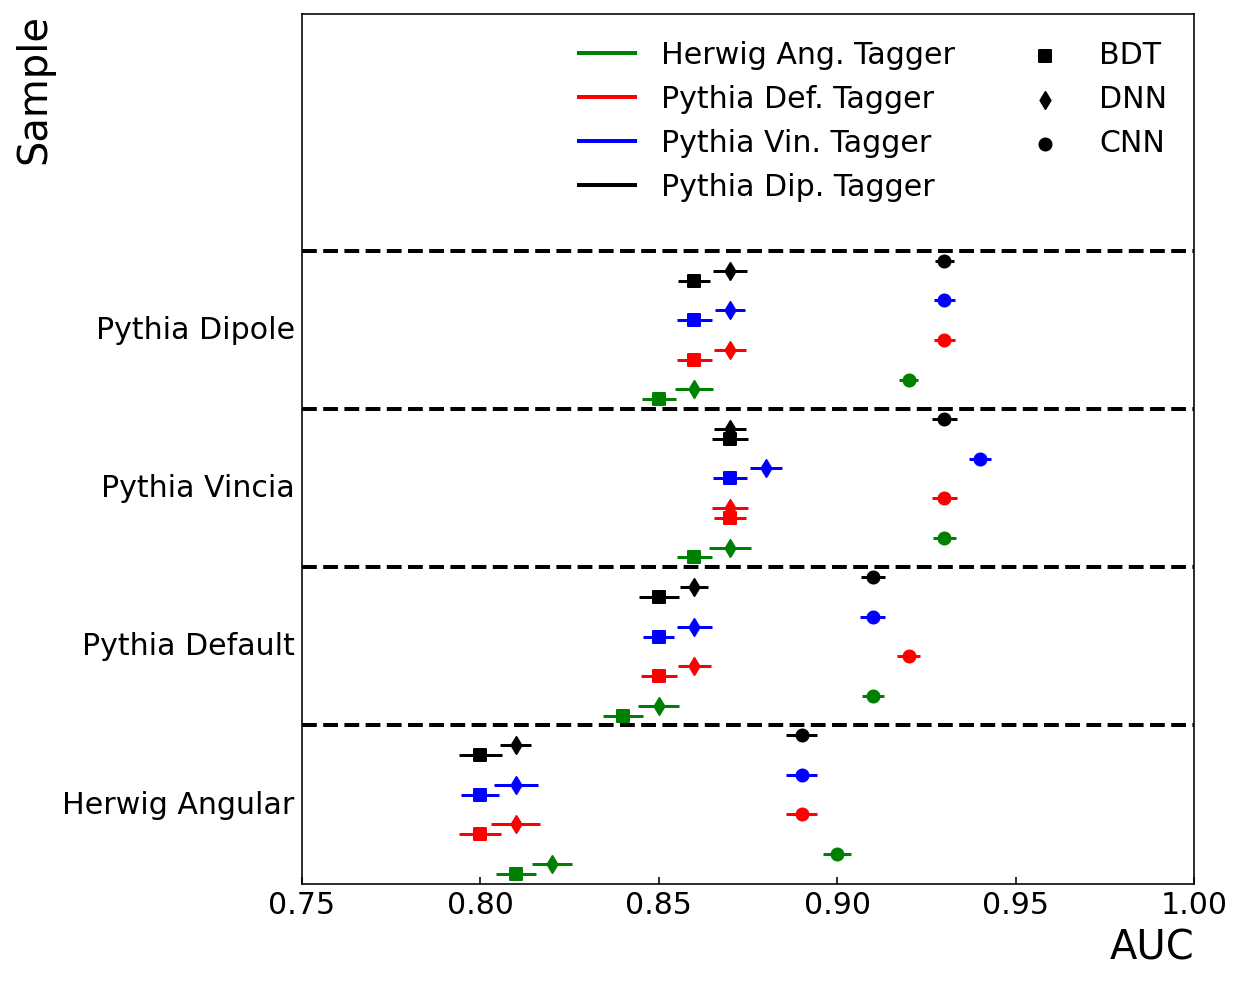

In [9]:
draw_summary(dictionary = auc_dict, xlabel="AUC", file_name="auc_summary", interval=20, xmin=0.75, xmax=1)

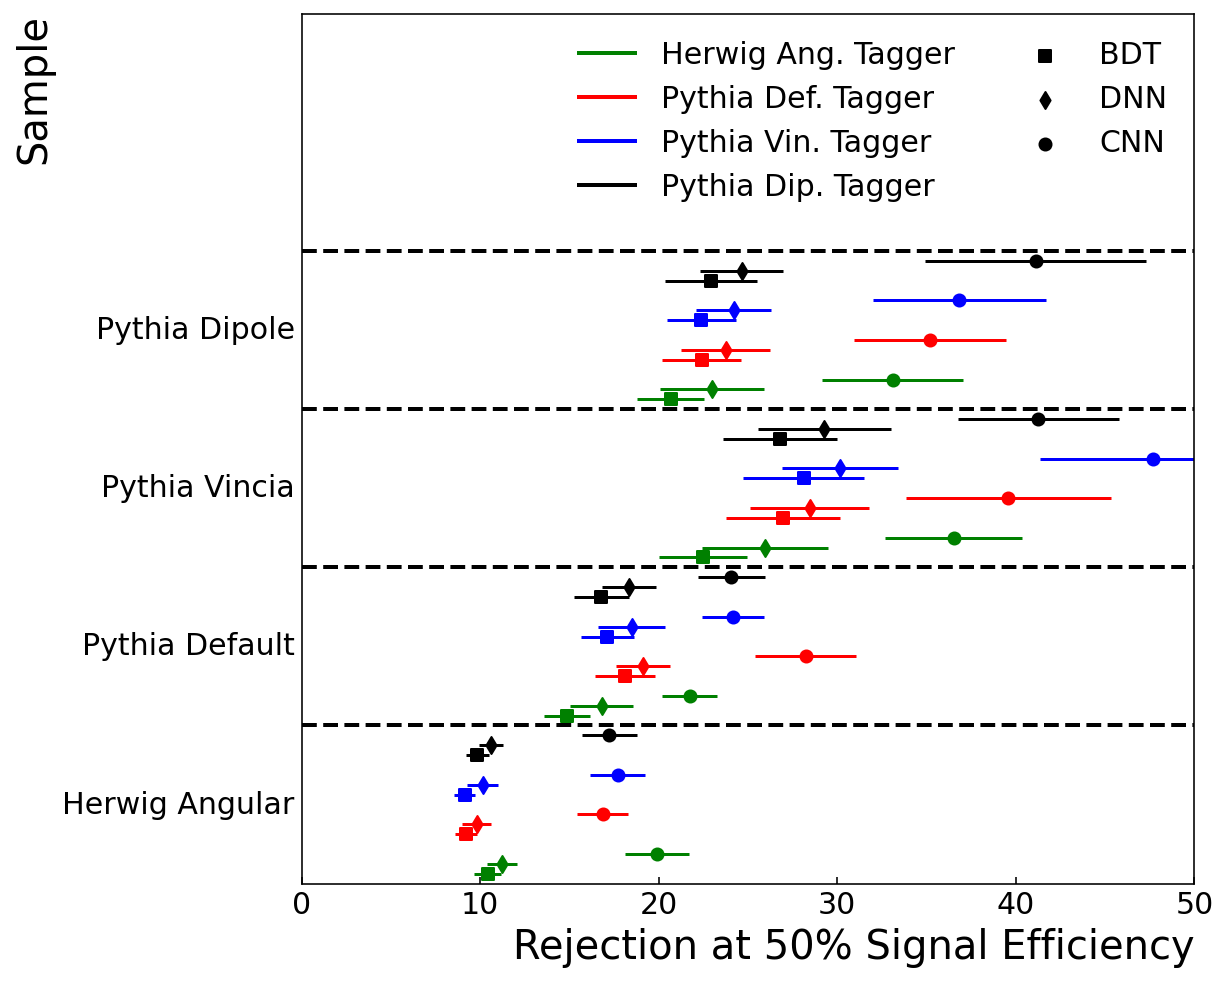

In [21]:
draw_summary(dictionary = rej_dict, xlabel="Rejection at 50% Signal Efficiency", file_name="rej_summary", interval=20, xmin=0, xmax=50)